In [1]:
import pandas as pd 
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format','{:.8}'.format)

In [2]:
application_train = pd.read_csv(r'D:\home loan credit risk\datas\application_train.csv')
bureau = pd.read_csv(r'D:\home loan credit risk\datas\bureau.csv')

In [3]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [63]:
bureau['CREDIT_TYPE'].value_counts()

CREDIT_TYPE
Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: count, dtype: int64

##### drop CREDIT_CURRENCY
         can create is he is taken the loan from another country 
         has_taken_loan_foreign
        this feature have 99% currency 1 values so this is low variance feature. it doesnt add any value.
##### drop CREDIT_DAY_OVERDUE in future if it isnt relevant
        we can use avg,flag credit_Day_overdue 

##### days_credit_enddatae
        avg credit enddate if the loan is active !!

        avg_total loans durations of all active and closed!On average, how long a person takes to repay their loans

##### days_enddate_fact
        client 
        filt on loans =='closed'
        avg_repayment_diff = DAYS_ENDDATE_FACT - DAYS_CREDIT_ENDDATE take mean for the per skidloanid
                Negative value: Loan was repaid early → indicates good financial behavior.
                Positive value: Loan was repaid late → possible financial stress or delay.


##### AMT_CREDIT_MAX_OVERDUE
         only 5% valesa re present so handle it with care
        has_overduee 1 or 0 binary flag
        max_credit_overdues from all loans per the client
        
###### CNT_CREDIT_PROLONG
        has_credit_prolong_customer
        cnt_no__of_credit_prolong_customer
        ratio_of_prolons_custoner = total_loans - prolong_loans

##### amt_credit_        
        active = bureau[bureau['CREDIT_ACTIVE'] =='Active']
        active[active['AMT_CREDIT_SUM_DEBT'] <=0]
        #treat nan values

        #AMT_CREDIT_SUM treat nan values 0 as 
        AMT_CREDIT_SUM create standard deviation feature

        #create max credit_sum_customer
        #create total debt reamining_customer
        #create max_AMT_CREDIT_SUM_LIMIT(avoid_null values) can fill with 0
        bureau[bureau['SK_ID_CURR']==215354]['AMT_CREDIT_SUM_LIMIT']

### has credit card feature!
        using the CREDIT_TYPE for per skidcust filter then

###### avg_credit_days
        AVG_DAYS_CREDIT_UPDATE_ACTIVE
        AVG_DAYS_CREDIT_UPDATE_ALL
        AVG_DAYS_CREDIT_UPDATE_CLOSED
        
##### DAYS_CREDIT_UPDATE
        latest_credit_update_days_ago_60_no
        latest_credit_update_days_ago_180_no  take max()
        latest_credit_update_days_ago_365_no
        
  
#####
        active_last_6_month  no of 
        closed_last_6_month     no of
        sold_credit_last_year  no of
        credit_actice_closed,credit_actice_active,credit_actice_sold,credit_actice_bad_loan


##### DAYS_CREDIT
        min_days_credit
        max_days_credit
        std_days_credit
        is_credit_recent_60
        is_credit_recent_90
        is_credit_recent_180
        is_credit_recent_365
        avg_days_credit

In [19]:
max([-12,-2])

-2

In [7]:
bureau['DAYS_CREDIT'].min()

-2922

In [6]:
bureau['CREDIT_CURRENCY'].value_counts(normalize=True)

CREDIT_CURRENCY
currency 1    0.999180
currency 2    0.000713
currency 3    0.000101
currency 4    0.000006
Name: proportion, dtype: float64

In [9]:
data_schema = {
    "FLAG_DOCUMENT_1":'int8',
    "FLAG_DOCUMENT_2":'int8',
    "FLAG_DOCUMENT_3":'int8',
    "FLAG_DOCUMENT_4":'int8',	
    "FLAG_DOCUMENT_5":'int8',	
    "FLAG_DOCUMENT_6":'int8',	
    "FLAG_DOCUMENT_7":'int8',	
    "FLAG_DOCUMENT_8":'int8',
    "FLAG_DOCUMENT_9":'int8',	
    "FLAG_DOCUMENT_10":'int8',	
    "FLAG_DOCUMENT_11":'int8',	
    "FLAG_DOCUMENT_12":'int8',	
    "FLAG_DOCUMENT_13":'int8',	
    "FLAG_DOCUMENT_14":'int8',	
    "FLAG_DOCUMENT_15":'int8',	
    "FLAG_DOCUMENT_16":'int8',	
    "FLAG_DOCUMENT_17":'int8',	
    "FLAG_DOCUMENT_18":'int8',	
    "FLAG_DOCUMENT_19":'int8',	
    "FLAG_DOCUMENT_20":'int8',	
    "FLAG_DOCUMENT_21":'int8',
    "FLAG_MOBIL":'int8',
    "FLAG_EMP_PHONE":'int8',
    "FLAG_WORK_PHONE":'int8',
    "FLAG_CONT_MOBILE":'int8',
    "FLAG_PHONE":'int8',
    "FLAG_EMAIL":'int8',
    "REGION_RATING_CLIENT":'int8',
    "REGION_RATING_CLIENT_W_CITY":'int8',



    "DAYS_BIRTH":'int32',
    "DAYS_EMPLOYED":'int32',
    "DAYS_ID_PUBLIS":'int32',
    "HOUR_APPR_PROCESS_START":'int32',
    "REG_REGION_NOT_LIVE_REGION":'int32',
    "REG_REGION_NOT_WORK_REGION":'int32',
    "LIVE_REGION_NOT_WORK_REGION":'int32',
    "REG_CITY_NOT_LIVE_CITY":'int32',
    "REG_CITY_NOT_WORK_CITY":'int32',
    "LIVE_CITY_NOT_WORK_CITY":'int32',


    "OWN_CAR_AGE":'float32',
    "DAYS_REGISTRATION":'float32',
    "CNT_FAM_MEMBERS":'float32',
    "AMT_REQ_CREDIT_BUREAU_DAY":'float32',
    "AMT_REQ_CREDIT_BUREAU_WEEK":'float32',
    "AMT_REQ_CREDIT_BUREAU_MON":'float32',
    "AMT_REQ_CREDIT_BUREAU_QRT":'float32',
    "AMT_REQ_CREDIT_BUREAU_YEAR":'float32',
    "AMT_REQ_CREDIT_BUREAU_HOUR":'float32',
    "REGION_POPULATION_RELATIVE":'float32',
    "OBS_30_CNT_SOCIAL_CIRCLE":'float32',
    "DEF_30_CNT_SOCIAL_CIRCLE":'float32',
    "OBS_60_CNT_SOCIAL_CIRCLE":'float32',
    "DEF_60_CNT_SOCIAL_CIRCLE":'float32',
    "DAYS_LAST_PHONE_CHANGE":'float32',
    "APARTMENTS_AVG":'float32',
    "BASEMENTAREA_AVG":'float32',
    "YEARS_BEGINEXPLUATATION_AVG":'float32',
    "YEARS_BUILD_AVG":'float32',
    "COMMONAREA_AVG":'float32',
    "ELEVATORS_AVG":'float32',
    "ENTRANCES_AVG":'float32',
    "FLOORSMAX_AVG":'float32',
    "FLOORSMIN_AVG":'float32',
    "LANDAREA_AVG":'float32',
    "LIVINGAPARTMENTS_AVG":'float32',
    "LIVINGAREA_AVG":'float32',
    "NONLIVINGAPARTMENTS_AVG":'float32',
    "NONLIVINGAREA_AVG":'float32',
    "APARTMENTS_MODE":'float32',
    "BASEMENTAREA_MODE":'float32',
    "YEARS_BEGINEXPLUATATION_MODE":'float32',
    "YEARS_BUILD_MODE":'float32',
    "COMMONAREA_MODE":'float32',
    "ELEVATORS_MODE":'float32',
    "ENTRANCES_MODE":'float32',
    "FLOORSMAX_MODE":'float32',
    "FLOORSMIN_MODE":'float32',
    "LANDAREA_MODE":'float32',
    "LIVINGAPARTMENTS_MODE":'float32',
    "LIVINGAREA_MODE":'float32',
    "NONLIVINGAPARTMENTS_MODE":'float32',
    "NONLIVINGAREA_MODE":'float32',
    "APARTMENTS_MEDI":'float32',
    "BASEMENTAREA_MEDI":'float32',
    "YEARS_BEGINEXPLUATATION_MEDI":'float32',
    "YEARS_BUILD_MEDI":'float32',
    "COMMONAREA_MEDI":'float32',
    "ELEVATORS_MEDI":'float32',
    "ENTRANCES_MEDI":'float32',
    "FLOORSMAX_MEDI":'float32',
    "FLOORSMIN_MEDI":'float32',
    "LANDAREA_MEDI":'float32',
    "LIVINGAPARTMENTS_MEDI":'float32',
    "LIVINGAREA_MEDI":'float32',
    "NONLIVINGAPARTMENTS_MEDI":'float32',
    "NONLIVINGAREA_MEDI":'float32',
    "TOTALAREA_MODE":'float32'
}


In [6]:
#cleanm name NAME_EDUCATION_TYPE and  'Secondary / secondary special':'Secondary education'
application_train['NAME_EDUCATION_TYPE'] = application_train['NAME_EDUCATION_TYPE'].replace({
    'Secondary / secondary special':'Secondary education'
})

#cleanm name family status and assign single instead of single / not married
application_train['NAME_FAMILY_STATUS'] = application_train['NAME_FAMILY_STATUS'].replace({
    'Single / not married': 'Single'
})

application_train['NAME_HOUSING_TYPE'] = application_train['NAME_HOUSING_TYPE'].replace({
    'House / apartment': 'Owned'
})


#remove the days employed,days_birth,days_employed extreme correlated

application_train['YEARS_AGE'] = round(-application_train['DAYS_BIRTH'] / 365)
application_train['YEARS_EMPLOYED'] = round(-application_train['DAYS_EMPLOYED'] / 365)
application_train['YEARS_REGISTRATION'] = round(-application_train['DAYS_REGISTRATION'] / 365)
application_train['YEARS_ID_PUBLISH'] =  round(-application_train['DAYS_ID_PUBLISH'] / 365)


#delete this after end
application_train.drop(columns=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'],inplace=True)

In [ ]:
application_train['YEARS_AGE'].astype('float32')
application_train['YEARS_EMPLOYED'].astype('float32')
application_train['YEARS_REGISTRATION'].astype('float32')
application_train['YEARS_ID_PUBLISH'].astype('float32')

<Axes: >

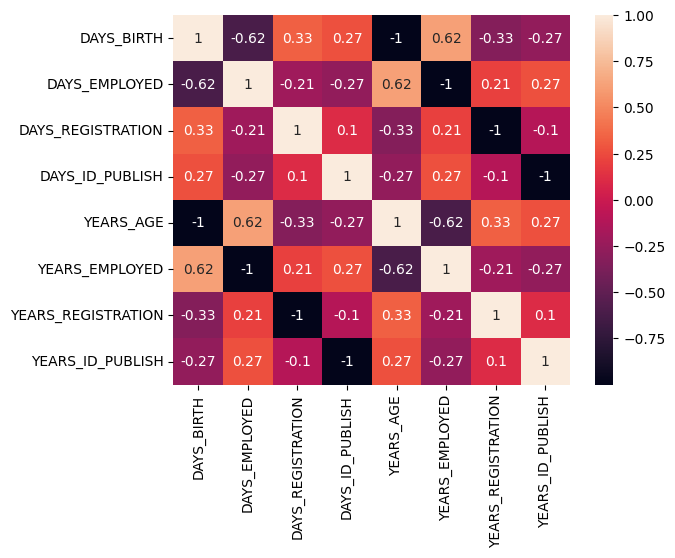

In [13]:
sns.heatmap(application_train[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','YEARS_AGE','YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH']].corr(),annot=True)

In [14]:
application_train.drop(columns=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'],inplace=True)

In [22]:
application_train['YEARS_AGE'].astype('float32').info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: YEARS_AGE
Non-Null Count   Dtype  
--------------   -----  
307511 non-null  float32
dtypes: float32(1)
memory usage: 1.2 MB


In [15]:
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary education,Single,Owned,0.018801,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,2.0,10.0,6.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,Owned,0.003541,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.0,3.0,1.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary education,Single,Owned,0.010032,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [27]:
#while wring src use loggind and better format
#use this in the inferene pipeline also
def convret_int64_to_int32(df:pd.DataFrame,feature_names: list):
    """ convert the int64 to int 32
    df: dataframe
    feature_names: features names which have int 64 and trying to convert in into int32
    """
    try:
        for feature in feature_names:
            df[feature]  = df[feature].astype('int32')

    except KeyError as e:
        print(f'this feature name isn\'t in the dataframe: {e}')
        raise
    except Exception as e:
        print(f'unexpected error arrived: {e}')
        raise
